In [2]:
model = "model1"
import numpy as np
import matplotlib.pyplot as plt
import os

p=2
m=5

data = np.loadtxt("./coefficients_"+str(model)+".txt")
A=data.reshape(p+1,m,m)
A0inv = np.linalg.inv(np.identity(m)-A[0,:,:])

nrec = 200000
yprev = np.random.normal(loc=0.0,scale=np.sqrt(0.1),size=(p,m))
y = [*yprev]
for t in range(nrec-p):
    aype = np.random.normal(loc=0.0,scale=np.sqrt(0.1),size=(m))
    for i in range(1,A.shape[0]):
        aype = aype + np.dot(A[i,:,:],y[-i])
    yt = np.dot(A0inv,aype)
    y.append(yt)
y=np.array(y)
print(y.shape)

outdir='./data/'
os.makedirs(outdir, exist_ok=True)
np.savetxt(os.path.join(outdir,model+".dat"),y)

(200000, 5)


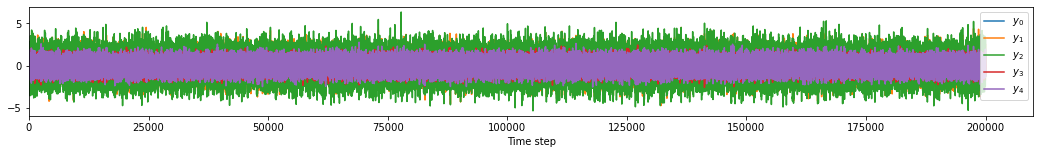

In [3]:
fig=plt.figure(figsize=(18,2))
ax=fig.add_subplot(111)
for im in range(m):
    ax.plot(y[:,im],label="$y_{:}$".format(im))
ax.set_xlabel("Time step")
ax.set_xlim(0,None)
ax.legend()
plt.show()

y_0: average= -0.0012 , variance=  0.2611
y_1: average= -0.0026 , variance=  1.1072
y_2: average= -0.0075 , variance=  1.6798
y_3: average=  0.0024 , variance=  0.3200
y_4: average= -0.0008 , variance=  0.3825


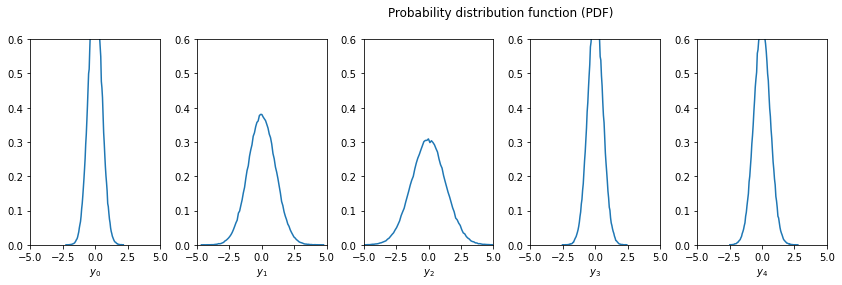

In [4]:
for im in range(m):
    ave = np.average(y[:,im])
    var = np.var(y[:,im])
    print(r"y_{:}".format(im)+": average={:8.4f}".format(ave),", variance={:8.4f}".format(var))

fig = plt.figure(figsize=(14,4))
ncol=6
for im in range(m):
    ax = plt.subplot2grid((int(m/ncol)+1,ncol), (int(im/ncol),im%ncol))
    d = y[:,im]
    x_hist, bins = np.histogram(d,bins=100)
    x_range = (bins[:-1] + bins[1:])/2
    bin_width = bins[1]-bins[0]
    pdf = x_hist / d.size / bin_width
    #print("# Check normalization of PDF", np.sum(pdf)*bin_width)
    ax.plot(x_range,pdf)
    ax.set_xlabel("$y_{:}$".format(im))
    ax.set_ylim(0,0.6)
    ax.set_xlim(-5,5)
fig.suptitle("Probability distribution function (PDF)")
fig.tight_layout()
plt.show()

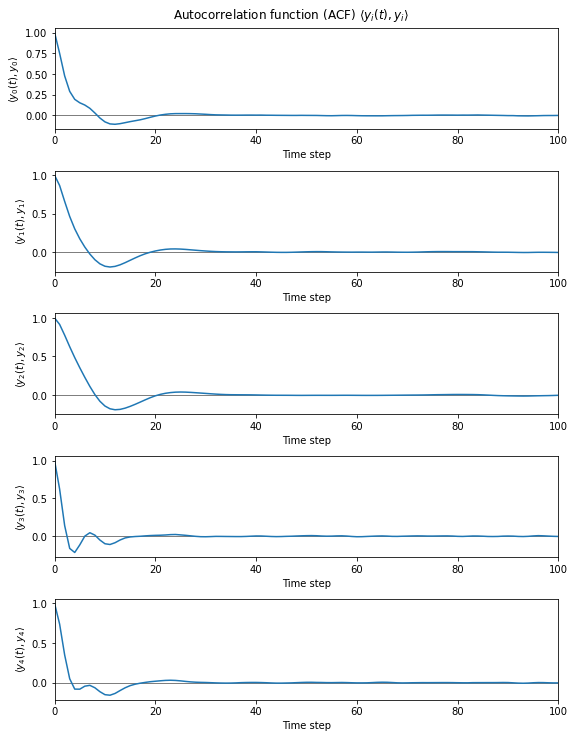

In [5]:
fig = plt.figure(figsize=(8,12))
ncol=1
for im in range(m):
    ax = plt.subplot2grid((int(m/ncol)+1,ncol), (int(im/ncol),im%ncol))
    d = y[:,im]
    d = d - np.average(d)
    acf = np.correlate(d,d,mode="full")[len(d)-1:]
    acf = acf / acf[0]
    ax.axhline(0,lw=0.5,c="k")
    ax.plot(acf[:])
    ax.set_xlabel(r"Time step")
    ax.set_ylabel(r"$\langle y_{:}(t),y_{:} \rangle$".format(im,im))
    ax.set_xlim(0,100)
fig.suptitle(r"Autocorrelation function (ACF) $\langle y_i(t),y_i \rangle$")
fig.tight_layout()
plt.show()

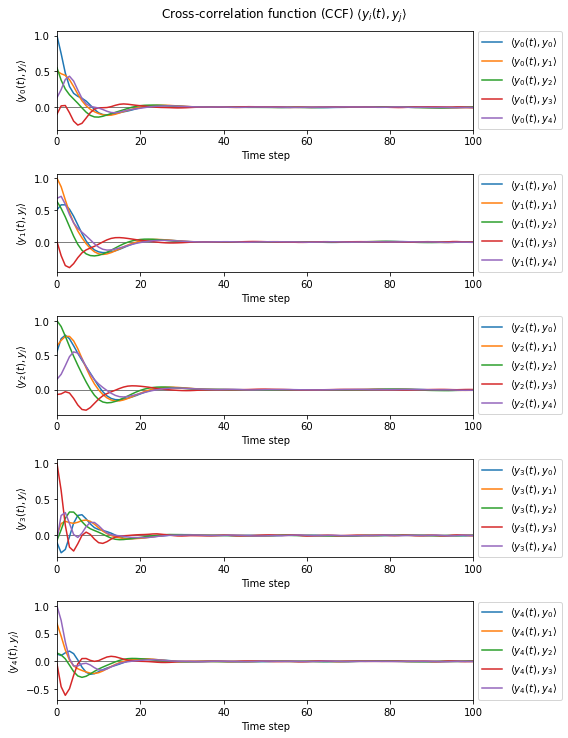

In [6]:
fig = plt.figure(figsize=(8,12))
ncol=1
for im1 in range(m):
    ax = plt.subplot2grid((int(m/ncol)+1,ncol), (int(im1/ncol),im1%ncol))
    d1 = y[:,im1]
    d1 = d1 - np.average(d1)
    ax.axhline(0,lw=0.5,c="k")
    for im2 in range(m):
        d2 = y[:,im2]
        d2 = d2 - np.average(d2)
        ccf = np.correlate(d1,d2,mode="full")[len(d1)-1:]
        ccf = ccf / np.sqrt(np.sum(d1*d1)*np.sum(d2*d2))
        ax.plot(ccf[:],label=r"$\langle y_{:}(t),y_{:} \rangle$".format(im1,im2))
        ax.set_xlabel(r"Time step")
        ax.set_ylabel(r"$\langle y_{:}(t),y_j \rangle$".format(im1))
        ax.set_xlim(0,100)
        ax.legend(loc="center left", bbox_to_anchor=(1,0.5))
fig.suptitle(r"Cross-correlation function (CCF) $\langle y_i(t),y_j \rangle$")
fig.tight_layout()
plt.show()

In [7]:
im=0
d = y[:,im]
x_hist, bins = np.histogram(d,bins=100)
x_range = (bins[:-1] + bins[1:])/2
bin_width = bins[1]-bins[0]
pdf = x_hist / d.size / bin_width
x_range = (bins[:-1] + bins[1:])/2

im1=0
d1 = y[:,im1]
d1 = d1 - np.average(d1)
ccf = []
for im2 in range(m):
    d2 = y[:,im2]
    d2 = d2 - np.average(d2)
    wccf = np.correlate(d1,d2,mode="full")[len(d1)-1:]
    wccf = wccf / np.sqrt(np.sum(d1*d1)*np.sum(d2*d2))
    ccf.append(wccf)
ccf=np.array(ccf)[:,0:100]
np.savetxt("./data/range_y0_simulation.txt",x_range)
np.savetxt("./data/pdf_y0_simulation.txt",pdf)
np.savetxt("./data/ccf_y0_simulation.txt",ccf)

(100,) (5, 100)


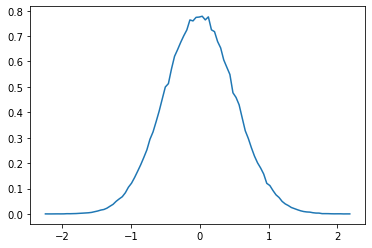

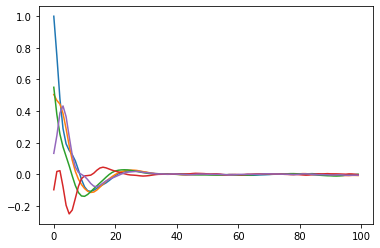

In [8]:
print(pdf.shape,ccf.shape)
plt.plot(x_range,pdf)
plt.show()
plt.plot(ccf.T)
plt.show()